In [1]:
#importing necessary modules for mathematical analysis 
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
%load_ext autoreload
%autoreload 2

In [2]:
#importing homebrew module for stock analysis, kindly check the documentation of the module nambiarkit for more details
import nambiarkit as nk

In [3]:
#returns a dictionary of pandas DataFrames consisting of stock price movements of Tata Steel, Tata Motors, TItan and Tata Chemicals
td = nk.tata_data()

- ### TATA GROUP - PRIMARY ANALYSIS OF ADJUSTED CLOSING PRICES

In [4]:
#returns the closing price of Stocks of companies in Tata Group and prints the first six values
tata_close = nk.aclose(td)
tata_close.head()

,Steel,Motors,Titan,Chemicals
Date,,,,
2017-01-02,364.222870,487.250000,327.881042,197.628067
2017-01-03,361.133545,481.250000,341.822998,198.252014
2017-01-04,363.058380,486.500000,353.114014,196.984619
2017-01-05,375.459930,501.950012,351.543091,198.407791
2017-01-06,375.684570,497.799988,348.744904,197.803299


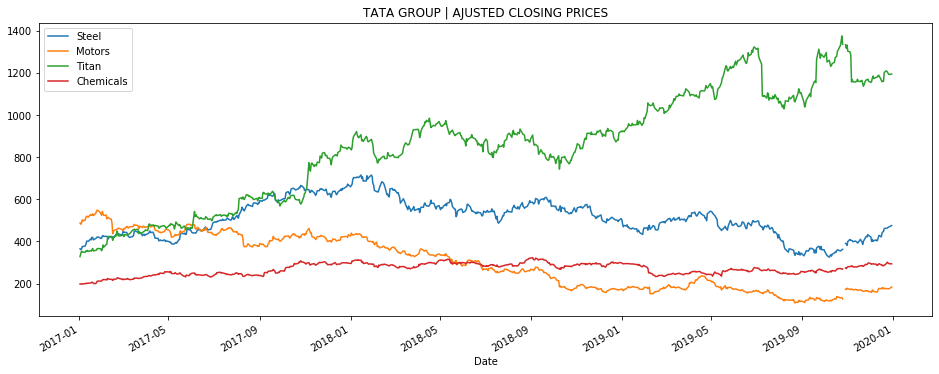

In [5]:
#plots the time series of adjusted closing prices of the returned Tata Stocks using matplotlib
tata_close.plot(figsize = (16, 6), title = 'TATA GROUP | AJUSTED CLOSING PRICES')

- ### ANALYSIS OF RETURNS OF TATA STOCKS

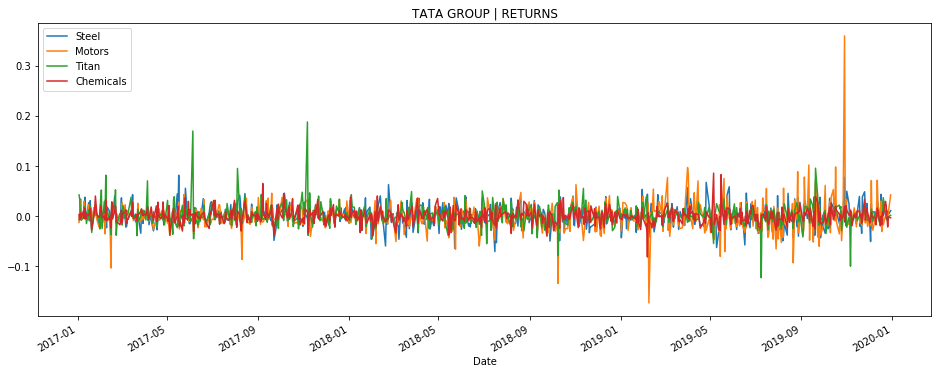

In [6]:
#returns the time series data of daily returns of selected stocks of Tata Group companies and plots it using matplotlib
rets_tata = tata_close.pct_change()
rets_tata.plot(title = 'TATA GROUP | RETURNS', figsize = (16,6))

In [7]:
#returns the volatilty of the selected stocks of Tata Group companies
tata_vol = rets_tata.std()
tata_vol

Steel        0.020573
Motors       0.028290
Titan        0.020645
Chemicals    0.014820
dtype: float64

In [8]:
#measures the covariance of the selected stocks of Tata Group companies
cov_tata = rets_tata.cov()

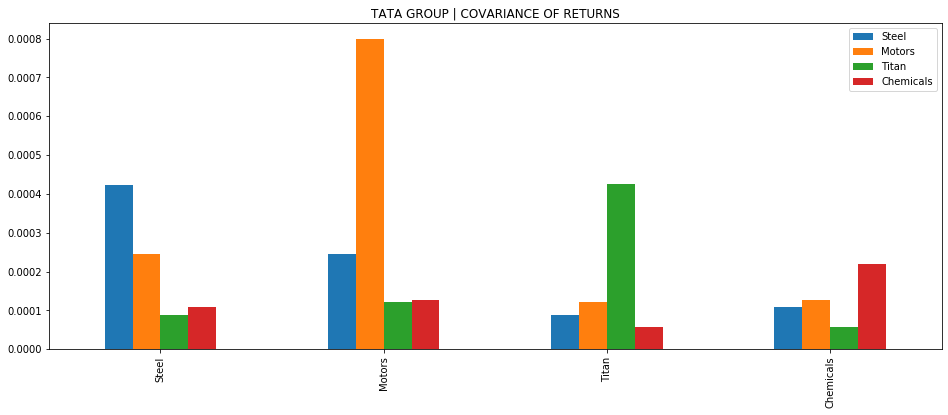

In [9]:
#plots the covariance of the selected stocks of Tata Group companies
cov_tata.plot.bar(figsize = (16,6), title = 'TATA GROUP | COVARIANCE OF RETURNS')

In [10]:
#measures the Pearson Correlation Coefficients of the selected stocks of Tata Group companies
pearson_corr_tata = rets_tata.corr()
#if the correlation coefficient is lesser than 0.7, we can ignore the same in the regression analysis
pearson_corr_tata

,Steel,Motors,Titan,Chemicals
Steel,1.000000,0.420319,0.205540,0.354285
Motors,0.420319,1.000000,0.207134,0.303485
Titan,0.205540,0.207134,1.000000,0.187147
Chemicals,0.354285,0.303485,0.187147,1.000000


- ### COMPETITOR ANALYSIS

In [11]:
#returns the data of Tata Steel and the major competitors JSW, Jindas Steel and SAIL stock prices
steel = nk.steel_data()

In [12]:
#returns the closing prices of the stocks and prints the first six values
st_close = nk.aclose(steel)
st_close.head()

,Tata Steel,JSW Steel,Jindal Steel,SAIL
Date,,,,
2017-01-02,364.222870,153.414658,327.881042,49.707222
2017-01-03,361.133545,154.376862,341.822998,50.839169
2017-01-04,363.058380,153.057953,353.114014,49.756435
2017-01-05,375.459930,164.885788,351.543091,51.134457
2017-01-06,375.684570,164.463364,348.744904,51.183674


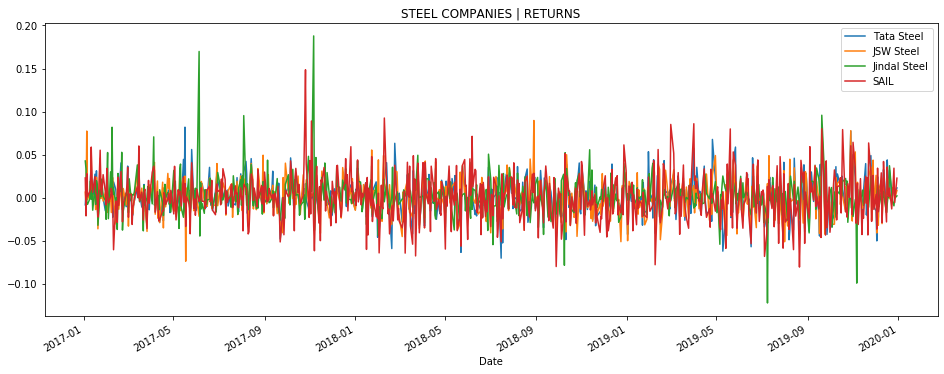

In [13]:
#returns the time series data of daily returns of selected steel companies and plots it using matplotlib
st_ret = st_close.pct_change()
st_ret.plot(title = 'STEEL COMPANIES | RETURNS', figsize = (16,6))

In [14]:
#returns the covariance of the Steel company returns 
cov_steel = st_ret.cov()
cov_steel

,Tata Steel,JSW Steel,Jindal Steel,SAIL
Tata Steel,0.000423,0.000274,0.000087,0.000377
JSW Steel,0.000274,0.000423,0.000082,0.000323
Jindal Steel,0.000087,0.000082,0.000426,0.000109
SAIL,0.000377,0.000323,0.000109,0.000721


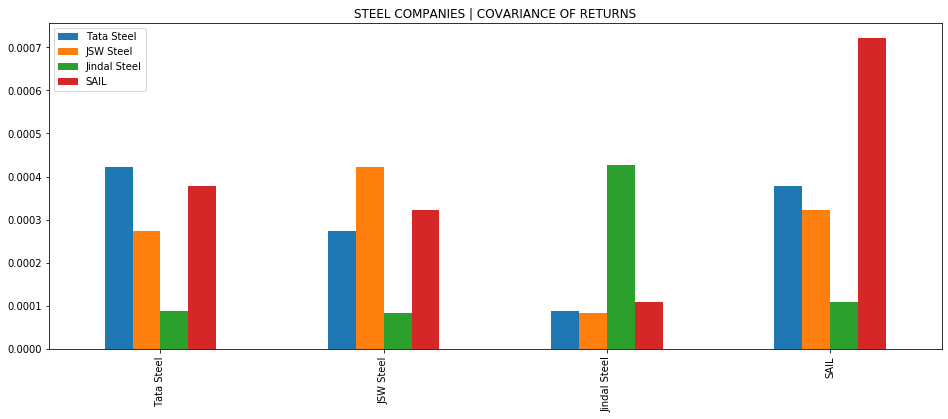

In [15]:
#plots the covariance of the Steel company returns using matplotlib
cov_steel.plot.bar(title = 'STEEL COMPANIES | COVARIANCE OF RETURNS', figsize = (16,6))

In [16]:
#measures the Pearson Correlation Coefficients of the selected stocks of Steel companies
pearson_corr_steel = st_ret.corr()
#if the correlation coefficient is lesser than 0.7, we can ignore the same in the regression analysis 
pearson_corr_steel

,Tata Steel,JSW Steel,Jindal Steel,SAIL
Tata Steel,1.000000,0.646962,0.205540,0.682471
JSW Steel,0.646962,1.000000,0.193898,0.585087
Jindal Steel,0.205540,0.193898,1.000000,0.197348
SAIL,0.682471,0.585087,0.197348,1.000000


- ### REGRESSION MODEL FOR THE RETURNS OF TATA STEEL STOCK (ADJUSTED CLOSING PRICE)

In [17]:
#takes the time series data of Tata Steel stock prices from the pandas DataFrame of Tata Group
ts = pd.DataFrame(tata_close['Steel']).dropna()
ts.columns = ['Adj. Close']
ts.head()

,Adj. Close
Date,
2017-01-02,364.222870
2017-01-03,361.133545
2017-01-04,363.058380
2017-01-05,375.459930
2017-01-06,375.684570


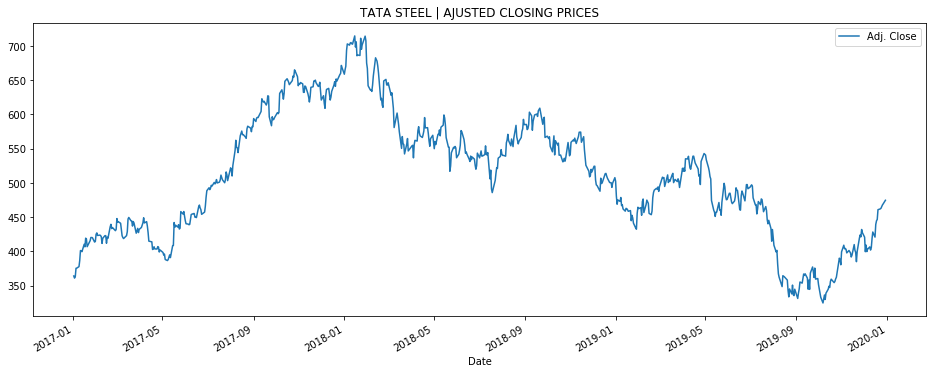

In [18]:
#plots the time series data of closing prices of Tata Steel stock prices using matplotlib
ts.plot(figsize = (16, 6), title = 'TATA STEEL | AJUSTED CLOSING PRICES')

In [19]:
#returns a variable for predicting 'forecast_out' days out into the future
forecast_out = 2
#create another column ( the target or dependent variable ) shifted 'n' units up
ts['Prediction'] = ts[['Adj. Close']].shift(-forecast_out)
#returns the new dataset
ts.head()

,Adj. Close,Prediction
Date,,
2017-01-02,364.222870,363.058380
2017-01-03,361.133545,375.459930
2017-01-04,363.058380,375.684570
2017-01-05,375.459930,377.878204
2017-01-06,375.684570,386.743011


In [20]:
#Create the independent data set (X)
#Convert the pandas DataFrame to a numpy array (list of list for easier access during regression)
X = np.array(ts.drop(['Prediction'],1))
#Remove the last 'forecast_out' rows
X = X[:-forecast_out] 

In [21]:
#Create the dependent data set (Y)
#Convert the pandas DataFram to a numpy array (All of the values including NAN's)
Y = np.array(ts['Prediction'])
#Get all the Y values except the last 'forecast_out' rows
Y = Y[:-forecast_out]

In [22]:
#Split the data into 80% training and 20%testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8)

$$ SVR_{solution} = {0.5}{||w||^2}_{minimize} $$
$$ |{y}_{i} - <w,x_i> - b| <= \epsilon| $$

In [23]:
#Create and Train the Support Vector Machine ( Regressor )
svr_rbf = SVR(kernel = 'rbf', C = 1000, gamma = 0.01 )
svr_rbf.fit(x_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
#Testing Model: score returns the coefficient of determination of R^2 of the prediction
#The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
svm_confidence

0.8772138909382929

$$ y = {x}{\beta} + {\epsilon} $$

In [25]:
#Create and Train the Linear Regressor
lr = LinearRegression().fit(x_train, y_train)

In [26]:
#Testing Model: score returns the coefficient of determination of R^2 of the prediction
#The best possible score is 1.0
lr_confidence = lr.score(x_test,y_test)
lr_confidence

0.9732451219475968

In [27]:
#Set x_forecast equal to the last forecast_out rows of the original data set from Adj. Close column
x_forecast = np.array(ts.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[469.5 ],
       [474.75]])

In [28]:
#print the linear regression model predictions for the next forecast_out days
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([470.02257336, 475.13954496])

In [29]:
#print the support vector regressor model predictions for the next forecast_out days
svm_prediction = svr_rbf.predict(x_forecast)
svm_prediction

array([468.3126401 , 457.49345481])